# Summer Research Week \# 1
## Finite Differences
### Linear Advection equation
\begin{align}
\frac{\partial}{\partial t} u(x,t)+ a \frac{\partial}{\partial x} u(x,t) &= 0\\
u(x,0) &= u_0(x)\\
u(0,t) &= u_l(t)\\
u(L,t) &= u_r(t)
\end{align}

where $u(x,t) : \mathbb{R}^{1+1} \to\mathbb{R}, a\in\mathbb{R}$

First way, I will attempt to solve this is the semidiscrete method, where we discretize the spatial elements using a finite difference scheme, and then treat the time continuously, so that we have a system of linear ODEs which we will plan to solve.

%% We know that $u(t,x) = u_0(x-at)$, where $u_0(x) = u(0,x), \forall x\in\mathbb{R}$

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.sparse.linalg as spla
from scipy.sparse import dia_array
from scipy.sparse.linalg import gmres

In [2]:
np.random.seed(12345)

In [106]:
def tridiag(a,b,c,n,*, is_sparse: bool = False):
    # Make a tridiagonal matrix, which is common in FDM
    
    if is_sparse == False:
        # Create an n x n tridiagonal matrix with subdiagonal a, diagonal b, and superdiagonal c
        A = np.diag(a * np.ones(n-1), -1) + np.diag(b * np.ones(n)) + np.diag(c * np.ones(n-1), 1)
    else:
        # An Attempt to make a sparse matrix structure. 
        ## Need to test
        ex = np.ones(n)
        data = np.array([a * ex, b * ex, c * ex])
        offsets = np.array([-1, 0, 1])
        A = dia_array((data, offsets), shape=(n, n)).toarray()
        
        
    return A
    

In [107]:
A = tridiag(1,2,3,5,is_sparse = False)

print(A)

[[2. 3. 0. 0. 0.]
 [1. 2. 3. 0. 0.]
 [0. 1. 2. 3. 0.]
 [0. 0. 1. 2. 3.]
 [0. 0. 0. 1. 2.]]


In [108]:
def fd3df(nx, ny, nz): #,ny,nz, alpx = 0, alpy = 0, alpz = 0, dshift = 0):
    # First order Forward Method
    
    # Create tridiagonal matrices tx, ty, and tz
    tx = tridiag(0, -1, 1, nx)
    ty = tridiag(0, -1, 1, ny)
    tz = tridiag(0, -1, 1, nz)
    A = tx
    if ny > 1:
        A = np.kron(np.eye(ny), A) + np.kron(ty,np.eye(nx))
        if nz > 1:
                A = np.kron(np.eye(nz), A) + np.kron(tz,np.eye(nx * ny))
    
    #A -= dshift * np.eye(nx * ny * nz)
    return A
    

In [109]:
A = fd3df(2,3,2)

print(A)

[[-3.  1.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0. -3.  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0. -3.  1.  1.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0. -3.  0.  1.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0. -3.  1.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0. -3.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0. -3.  1.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -3.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -3.  1.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -3.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -3.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -3.]]


In [7]:
def fd3dc(nx, ny, nz): #,ny,nz, alpx = 0, alpy = 0, alpz = 0, dshift = 0):
    # First order center Method
    
    # Create tridiagonal matrices tx, ty, and tz
    tx = tridiag(-1, 0, 1, nx, True)
    ty = tridiag(-1, 0, 1, ny, True)
    tz = tridiag(-1, 0, 1, nz, True)
    A = tx
    if ny > 1:
        A = np.kron(np.eye(ny), A) + np.kron(ty,np.eye(nx))
        if nz > 1:
                A = np.kron(np.eye(nz), A) + np.kron(tz,np.eye(nx * ny))
    
    #A -= dshift * np.eye(nx * ny * nz)
    return A
    # how can I do this in higher dimensional problems

In [8]:
A = fd3dc(3,3,1)

print(A)

[[ 0.  1.  0.  1.  0.  0.  0.  0.  0.]
 [-1.  0.  1.  0.  1.  0.  0.  0.  0.]
 [ 0. -1.  0.  0.  0.  1.  0.  0.  0.]
 [-1.  0.  0.  0.  1.  0.  1.  0.  0.]
 [-0. -1.  0. -1.  0.  1.  0.  1.  0.]
 [ 0. -0. -1.  0. -1.  0.  0.  0.  1.]
 [ 0.  0.  0. -1.  0.  0.  0.  1.  0.]
 [ 0.  0.  0. -0. -1.  0. -1.  0.  1.]
 [ 0.  0.  0.  0. -0. -1.  0. -1.  0.]]


### Linear heat equation
\begin{align}
\frac{\partial}{\partial t} u + a \frac{\partial^2}{\partial x^2} u &= 0
\end{align}

Just like above, we will start with the semidiscrete method. Since we have $u_{xx}$, we will discretize this using the standard 3-point stencil, where $x_i = ih, i = 0,\cdots, n+1, h = \frac{1}{n+1}$.

\begin{align}
u_{xx}(t, x_i) &\approx \frac{u(t, x_{i+1}) - 2u(t,x_i) + u(t,x_{i-1})}{h^2}
\end{align}
but we let $y_i(t) \approx u(t,x_i)$. Assuming the boundary conditions $y_0(t)$ and $y_{n+1}(t)$ are identically zero, and from the initial conditions, $y_i(0) = f(x_i), i = 1,\cdots, n$. We get the following system

\begin{align}
\mathbf{y}' &= \frac{a}{h^2}\begin{pmatrix} -2& 1 & 0 &\cdots & 0\\ 1& -2 &1 &\cdots & 0\\ 0 & 1& -2 & \cdots & 0\\ \vdots &\ddots & \ddots & \ddots & \vdots\\ 0 & \cdots & 0 & 1 & -2\end{pmatrix}\mathbf{y} = \mathbf{Ay}
\end{align}

The Jacobian matrix $\mathbf{A}$ of this system has eigenvalues between $-4ah^{-2}$ and 0, which makes the ODE very stiff as $h\ll 1$. This means we have to use a stiff ODE solver.

In [114]:
def fd3d(nx, ny, nz, alpx = 0, alpy = 0, alpz = 0, dshift = 0, *, is_sparse: bool = False):
    if is_sparse == False:
        # Create tridiagonal matrices tx, ty, and tz
        tx = tridiag(-1+alpx, 2, -1-alpx, nx)
        ty = tridiag(-1+alpx, 2, -1-alpx, ny)
        tz = tridiag(-1+alpx, 2, -1-alpx, nz)
    
        # Compute A using Kronecker products
        A = tx
        if ny > 1:
            A = np.kron(np.eye(ny), A) + np.kron(ty,np.eye(nx))
            if nz > 1:
                A = np.kron(np.eye(nz), A) + np.kron(tz,np.eye(nx * ny))
    
        A -= dshift * np.eye(nx * ny * nz)
    else:
       # Create tridiagonal matrices tx, ty, and tz
        tx = tridiag(-1+alpx, 2, -1-alpx, nx, is_sparse = True)
        ty = tridiag(-1+alpx, 2, -1-alpx, ny, is_sparse = True)
        tz = tridiag(-1+alpx, 2, -1-alpx, nz, is_sparse = True) 

        # Create sparse kroneckers
        A = tx
        if ny > 1:
            A = sp.sparse.kron(sp.sparse.identity(ny).toarray(),A) + sp.sparse.kron(ty,sp.sparse.identity(nx).toarray()).toarray()
            if nz > 1:
                A = sp.sparse.kron(sp.sparse.identity(nz).toarray(),A) + sp.sparse.kron(tz,sp.sparse.identity(nx * ny).toarray()).toarray()

        A -= dshift * sp.sparse.identity(nx * ny * nz)
    return A

In [115]:
A = fd3d(2,2,3)
B = fd3d(2,2,3, is_sparse = True)

print(A)

[[ 6. -1. -1.  0. -1. -0. -0. -0.  0.  0.  0.  0.]
 [-1.  6.  0. -1. -0. -1. -0. -0.  0.  0.  0.  0.]
 [-1.  0.  6. -1. -0. -0. -1. -0.  0.  0.  0.  0.]
 [ 0. -1. -1.  6. -0. -0. -0. -1.  0.  0.  0.  0.]
 [-1. -0. -0. -0.  6. -1. -1.  0. -1. -0. -0. -0.]
 [-0. -1. -0. -0. -1.  6.  0. -1. -0. -1. -0. -0.]
 [-0. -0. -1. -0. -1.  0.  6. -1. -0. -0. -1. -0.]
 [-0. -0. -0. -1.  0. -1. -1.  6. -0. -0. -0. -1.]
 [ 0.  0.  0.  0. -1. -0. -0. -0.  6. -1. -1.  0.]
 [ 0.  0.  0.  0. -0. -1. -0. -0. -1.  6.  0. -1.]
 [ 0.  0.  0.  0. -0. -0. -1. -0. -1.  0.  6. -1.]
 [ 0.  0.  0.  0. -0. -0. -0. -1.  0. -1. -1.  6.]]


Now that we were able to construct $\mathbf{y}' = \mathbf{Ay}$, where $A$ is a sparse linear system, we need to be able to solve this system. For 1D problems, we have a simple tridiagonal matrix, so we will use the direct method to solve this problem, but for 2D or 3D, the bandwidth is no longer efficient for solving using a direct way. This is where we will employ a few iterative algorithms like GMRES or PCG. 


### Fully discrete method
#### Explicit

We are now going to discretize time as well, so we will have a $1+1$ degree mesh and use a finite difference approximation.

\begin{align}
\frac{u_i^{k+1} - u_i^k}{\Delta t} - a\frac{u_{i+1}^k - 2u_i^k + u_{i-1}^k}{(\Delta x)^2} &= 0, \quad i = 1,\cdots, n
\end{align}
which we rearrange to get

\begin{align}
u_i^{k+1} &= u_i^k + a\frac{\Delta t}{(\Delta x)^2}\left( u_{i+1}^k - 2u_i^k + u_{i-1}^k\right), \quad i = 1,\cdots, n.
\end{align}

This gives us a fully explicit method as we are marching points forward in time, and all necessary information is already known. This comes from the fact that we have the boundary conditions $u_0^k = \alpha, u_{n+1}^k = \beta,\forall k$, and we have $u(x,t) = u_i^0$.


In [44]:
def heat_explicit1D():
    L = 1.
    T = 1.
    maxk = 210
    dt = T / maxk
    n = 10
    dx = L / n
    a = 1
    C = a * dt / (dx ** 2) # CFL constant
    if C >= 0.5:
        raise CourantConstantError('C is too high!')

    xpts = np.linspace(0, L, num = n + 1)
    tpts = np.linspace(0, T, num = maxk + 1 )

    # Initial condition function
    f = lambda x: np.sin(x)
    
    u = np.zeros((n+1, maxk+1), dtype = float)
    u[:,0] = f(xpts)

    # Boundary Values
    a = lambda x: np.exp(x)
    b = lambda x: np.exp(x) * np.sin(1)

    u[0, :] = a(tpts)
    u[n, :] = b(tpts)

    IpCA = tridiag(C,1 - 2*C,C,n+1, True) # Typical 1,2,1 stencil scaled by C with identity shift, i.e. (I + CA).
    for k in range(maxk):
            u[:,k+1] =  np.dot(IpCA, u[:,k])
        #for i in range(1,n):
        #    u[i,k+1] = u[i,k] + C * (u[i+1,k] - 2 * u[i,k] + u[i-1,k])
    
    
    return xpts, u

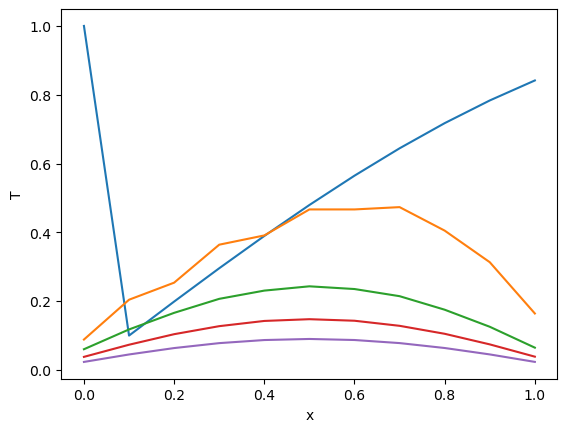

In [45]:
xpts, u = heat_explicit1D()

plt.plot(xpts,u[:,0], xpts, u[:,9], xpts, u[:,29], xpts, u[:,44], xpts, u[:,59])
plt.xlabel('x')
plt.ylabel('T')
#plt.legend('Initial','9','29','44','59')
plt.show()

#### Implicit

\begin{align}
u_{i}^{k+1} &= u_i^k + a\frac{\Delta t}{\left(\Delta x\right)^2} \left(u_{i+1}^{k+1} - 2 u_i^{k+1} + u_{i-1}^{k+1}\right)
\end{align}

But observe that we can rewrite this by moving all the future terms on one side and the current time terms on the other. This results in the following equation:
\begin{align}
u_{i}^{n+1} - \frac{\alpha\Delta t}{(\Delta x)^2}\left( u_{i-1}^{n+1} - 2 u_{i}^{n+1} + u_{i+1}^{n+1}\right) &= u_{i}^{n}\\
\left(\mathbf{I} - c\mathbf{A}\right) \mathbf{u}^{n+1} &= \mathbf{u}^n
\end{align}

This should not suprise us that to solve the implicit method there is a linear system solve involved (think Backward Euler's). Since we know that $\mathbf{I} - c\mathbf{A}$ has tridiagonal structure in the 1D diffusion case, we will use a direct solver for this (no fill in with LU).

We actually used the Thomas' algorithm since we have a tridiagonal SPD system, which is sl

In [13]:
def heat_implicit1D():
    # Problem Params: Length, Time, Time steps, etc.
    L = 1.
    T = 1.
    maxk = 210
    dt = T / maxk
    n = 10
    dx = L / n
    a = 1
    C = a * dt / (dx ** 2) # CFL constant
    if C >= 0.5:
        raise CourantConstantError('C is too high!')

    xpts = np.linspace(0, L, num = n + 1)
    tpts = np.linspace(0, T, num = maxk + 1 )

    # Initial condition function
    f = lambda x: np.sin(x)
    
    u = np.zeros((n+1, maxk+1), dtype = float)
    u[:,0] = f(xpts)

    # Boundary Values
    a = lambda x: np.exp(x)
    b = lambda x: np.exp(x) * np.sin(1)

    u[0, :] = a(tpts)
    u[n, :] = b(tpts)

    #for k in range(maxk):
    #    for i in range(1,n):
    #        u[i,k+1] = u[i,k] + C * (u[i+1,k] - 2 * u[i,k] + u[i-1,k])
    ImCA = tridiag(-C,1 + 2*C,-C,n+1, True) # Typical 1,2,1 stencil scaled by C with identity shift, i.e. (I - CA).
    supdiag = np.zeros(n+1)
    supdiag[1:n+1] = np.diag(ImCA,1)
    ab = np.array([supdiag, np.diag(ImCA)])
    for k in range(maxk):
        u[:,k+1] =  sp.linalg.solveh_banded(ab, u[:,k])
    
    return xpts, u

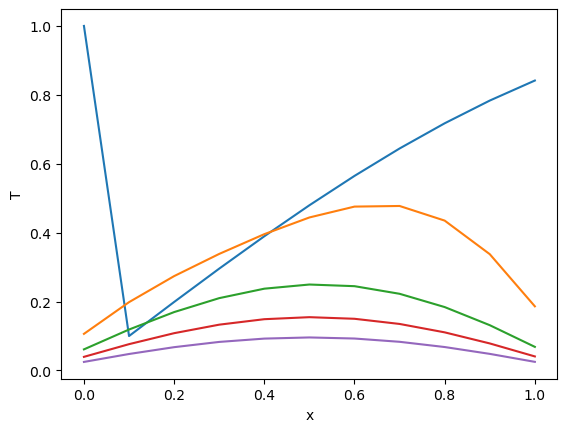

In [14]:
xpts, u = heat_implicit1D()

plt.plot(xpts,u[:,0], xpts, u[:,9], xpts, u[:,29], xpts, u[:,44], xpts, u[:,59])
plt.xlabel('x')
plt.ylabel('T')
#plt.legend('Initial','9','29','44','59')
plt.show()

#### Crank - Nicholson

Lastly, there is 

\begin{align}
u_{i}^{k+1} &= u_i^k + \frac{a}{2}\frac{\Delta t}{\left(\Delta x\right)^2} \left(u_{i+1}^{k+1} - 2 u_i^{k+1} + u_{i-1}^{k+1} + u_{i+1}^k - 2u_i^k + u_{i-1}^k \right)
\end{align}

which is unconditionally stable and second order in time as well. We then rewrite this in terms of matrix equations, by separating the future time steps and the current time steps, as above.

\begin{align}
u_{i}^{n+1} - \frac{\alpha\Delta t}{(\Delta x)^2}\left( u_{i-1}^{n+1} - 2 u_{i}^{n+1} + u_{i+1}^{n+1}\right) &= u_{i}^{n} + \frac{\alpha\Delta t}{(\Delta x)^2}\left( u_{i-1}^{n+1} - 2 u_{i}^{n+1} + u_{i+1}^{n+1}\right)\\
\left(\mathbf{I} - \frac{c}{2}\mathbf{A}\right) \mathbf{u}^{n+1} &= \left(\mathbf{I} + \frac{c}{2}\mathbf{A}\right)\mathbf{u}^n
\end{align}

Now we end up with another linear system solve at each step, where the system is tridiagonal and SPD. We do the same procedure as above. Again, I want to note that for higher dimension problems, we would NOT use the sparse banded solve. We would actually do an inner loop of an iterative method, like PCG, GMRES, GCR.

In [15]:
def heat_CN1D():
    # Problem Params: Length, Time, Time steps, etc.
    L = 1.
    T = 1.
    maxk = 210
    dt = T / maxk
    n = 10
    dx = L / n
    a = 1
    C = a * dt / (dx ** 2) # CFL constant
    if C >= 0.5:
        raise CourantConstantError('C is too high!')

    xpts = np.linspace(0, L, num = n + 1)
    tpts = np.linspace(0, T, num = maxk + 1 )

    # Initial condition function
    f = lambda x: np.sin(x)
    
    u = np.zeros((n+1, maxk+1), dtype = float)
    u[:,0] = f(xpts)

    # Boundary Values
    a = lambda x: np.exp(x)
    b = lambda x: np.exp(x) * np.sin(1)

    u[0, :] = a(tpts)
    u[n, :] = b(tpts)

    #for k in range(maxk):
    #    for i in range(1,n):
    #        u[i,k+1] = u[i,k] + C * (u[i+1,k] - 2 * u[i,k] + u[i-1,k])
    ImCA = tridiag(-C/2,1 + C,-C/2,n+1, True) # Typical 1,2,1 stencil scaled by C with identity shift, i.e. (I - CA).
    IpCA = tridiag(C/2,1 - C,C/2,n+1, True)
    supdiag = np.zeros(n+1)
    supdiag[1:n+1] = np.diag(ImCA,1)
    ab = np.array([supdiag, np.diag(ImCA)])
    for k in range(maxk):
        IpCAu = IpCA @ u[:,k]
        u[:,k+1] =  sp.linalg.solveh_banded(ab,IpCAu)
    
    return xpts, u

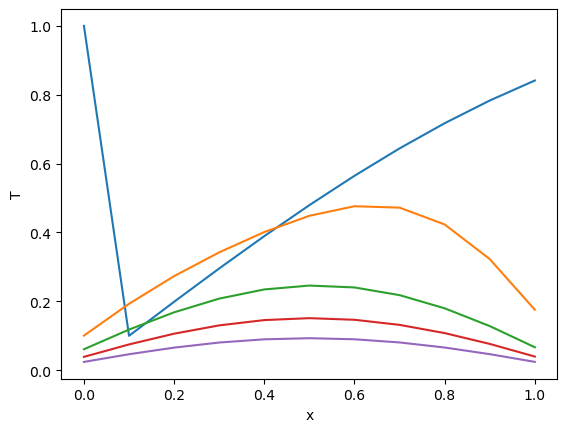

In [16]:
xpts, u = heat_CN1D()

plt.plot(xpts,u[:,0], xpts, u[:,9], xpts, u[:,29], xpts, u[:,44], xpts, u[:,59])
plt.xlabel('x')
plt.ylabel('T')
#plt.legend('Initial','9','29','44','59')
plt.show()

%% Could we use some FMM, or FFT method to solve the simple problems? 